***CASO DE ESTUDIO NUVO***

Algoritmo que me realiza el analisis de la base de datos fifa19 para encontrar los jugadores sub-valorados en el mercado.



In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('fifadata.csv',header=0)

In [3]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
list(data.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dt

In [6]:
data['Value'].dtypes

dtype('O')

Defino las columnas que considero de interes para analizar la data, me enfocare en un inicio en la columnas de caracter numerico y el nombre de Jugador 

In [7]:
no_interes = ['Unnamed: 0','Photo', 'Nationality', 'Flag',
        'Club', 'Club Logo', 'Special', 'Preferred Foot',  'Work Rate',
        'Body Type', 'Real Face', 'Position',
        'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until']

data_interes = data.drop(no_interes, axis=1)

***PREPARACIÓN DE LA DATA:***

Realizo funciones para la limpieza de datos, por ejemplo en las columnas Value, Wage convertir los valores a valores numericos, al igual que las columnas Height, Weight, entre otras

In [8]:
data_interes.head()

,ID,Name,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,94,94,€110.5M,€565K,5.0,4.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,94,94,€77M,€405K,5.0,4.0,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,92,93,€118.5M,€290K,5.0,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,91,93,€72M,€260K,4.0,3.0,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,91,92,€102M,€355K,4.0,5.0,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
def convert_money(m):
    m = str(m)
    if m.startswith('€'):
        m = m[1:]
    multiplo = None
    if m.endswith('M'):
        m = m[:-1]
        multiplo = 1e6
    elif m.endswith('B'):
        m = m[:-1]
        multiplo = 1e9
    elif m.endswith('K'):
        m = m[:-1]
        multiplo = 1e3
    res = float(m)
    if multiplo:
        res = res*multiplo
    return res

#convertir pies a pulgadas
def convert_height(h):
    if isinstance(h, float):
        return h
    
    f , n = h.split("'")
    
    return int(f)*12 + int(n)

#Eliminar lbs
def convert_weight(w):
    w = str(w)
    w = w.replace('lbs','')
    return float(w)

In [14]:
data_interes['Value'] = data_interes['Value'].apply(convert_money)
data_interes['Wage'] = data_interes['Wage'].apply(convert_money)
data_interes['Release Clause'] = data_interes['Release Clause'].apply(convert_money)



In [16]:
data_interes[['Value', 'Wage']].head()

,Value,Wage
0,110500000.0,565000.0
1,77000000.0,405000.0
2,118500000.0,290000.0
3,72000000.0,260000.0
4,102000000.0,355000.0


In [19]:
data_interes['Weight']= data_interes['Weight'].apply(convert_weight)
data_interes['Height']= data_interes['Height'].apply(convert_height)

In [20]:
data_interes[['Height', 'Weight']].head()

,Height,Weight
0,67.0,159.0
1,74.0,183.0
2,69.0,150.0
3,76.0,168.0
4,71.0,154.0


***LIMPIEZA DE LA DATA:***

Se analizara dentro de la base de datos la frecuencia de valores null

In [21]:
data_interes.columns

Index(['ID', 'Name', 'Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [33]:
list(data_interes.isnull().sum())


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 48,
 48,
 48,
 48,
 48,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 2085,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 1564]

En el analisis de valores nulos, vemos que se repite mucho el 48 en varias columnas, se podria verificar si estos valores corresponden al mismo ID. Lo podemos analizar con las columns height & weight

In [35]:
null_height = data_interes[data_interes['Height'].isnull()].index.tolist()
null_weight = data_interes[data_interes['Weight'].isnull()].index.tolist()
if null_height == null_weight:
    print('Tienen mismo ID')
else:
    print('Son Diferentes')

Tienen mismo ID


In [36]:
#probamos con las demas columnas, y observamos si se mantiene la relación 

data_interes.drop(data_interes.index[null_height],inplace =True)

In [37]:
list(data_interes.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 2037,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1516]

Se tenia razon, conservan los mismos valores nulos, ahora contamos con una data mas limpia de valores nulos.

In [38]:
data_interes

,ID,Name,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,65,60000.0,1000.0,1.0,2.0,2.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,243165,N. Christoffersson,19,47,63,60000.0,1000.0,1.0,2.0,2.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,241638,B. Worman,16,47,67,60000.0,1000.0,1.0,3.0,2.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,246268,D. Walker-Rice,17,47,66,60000.0,1000.0,1.0,3.0,2.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


Encuentro que hay columnas de caracter numerico que por su naturaleza no alcanzo comprender, por consiguiente no las tendre en cuenta para el anlisis de la data

In [41]:
no_interes2 =['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
data_interes = data_interes.drop(no_interes2, axis=1)
data_interes.columns

Index(['ID', 'Name', 'Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

***ANALISIS DE LA DATA:***

Con el fin de observar el comportamiento del valor del jugador respecto a diferentes variables, se realizara un analisis grafico para encontrar posibles insights y conclusiones para definir si un jugador es subvalorado 

In [42]:
data_interes

,ID,Name,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,65,60000.0,1000.0,1.0,2.0,2.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,243165,N. Christoffersson,19,47,63,60000.0,1000.0,1.0,2.0,2.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,241638,B. Worman,16,47,67,60000.0,1000.0,1.0,3.0,2.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,246268,D. Walker-Rice,17,47,66,60000.0,1000.0,1.0,3.0,2.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [47]:
# Data visualización
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [45]:
data_interes.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18159.000000,18159.000000,18159.000000,18159.000000,1.815900e+04,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,1.664300e+04
mean,214279.590286,25.122529,66.249904,71.319126,2.416131e+06,9752.574481,1.113222,2.947299,2.361308,71.361253,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,4.585061e+06
std,29968.461880,4.670568,6.914613,6.134420,5.601319e+06,22024.397597,0.394031,0.660456,0.756164,2.649664,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,1.111872e+07
min,16.000000,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,61.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,200300.000000,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,69.000000,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.250000e+05
50%,221743.000000,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1.000000,3.000000,2.000000,71.000000,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+06
75%,236508.500000,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,1.000000,3.000000,3.000000,73.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,3.500000e+06
max,246620.000000,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,5.000000,81.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,2.281000e+08


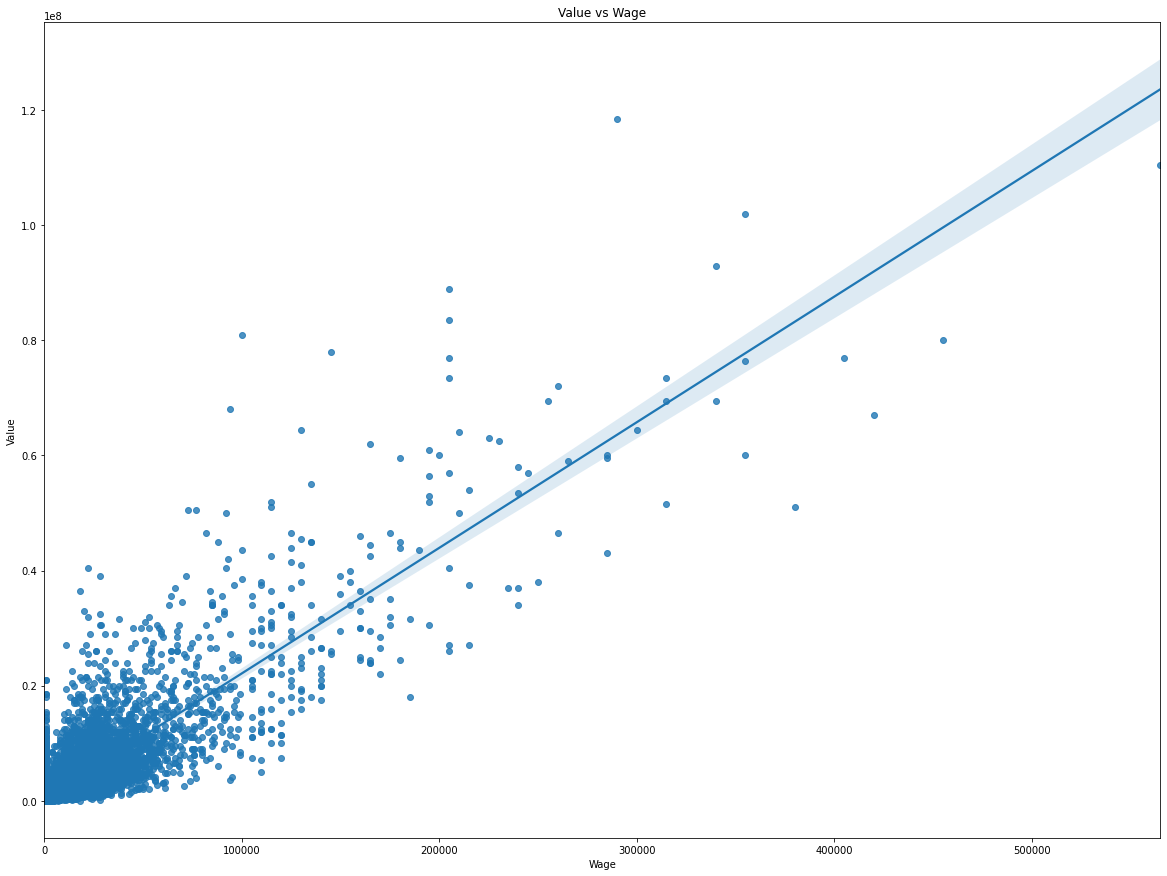

In [48]:
plt.figure(figsize=(20, 15))
sns.regplot(data_interes['Wage'] , data_interes['Value'])
plt.title('Value vs Wage')
plt.show()


***VALUE VS WAGE***

Se graficaron los valores de la columna Value vs la columna Wage tomando como variable dependiente Value e independiente los datos de Wage, con el fin de observar el comportamiento de relación entre las dos variables. De la grafica se puede observar que a pesar de que la linea de tendencia presenta un compartimiento lineal, se ve dispersión en los datos dando a entender que las variables no son linealmente dependientes, hay valores donde el salario es bajo y el valor del jugador es alto, de esto se deduce que el valor del jugador no está ligado al salario del mismo, sino que hay otro tipo de variables a tener en cuenta para definir el valor de un jugador.

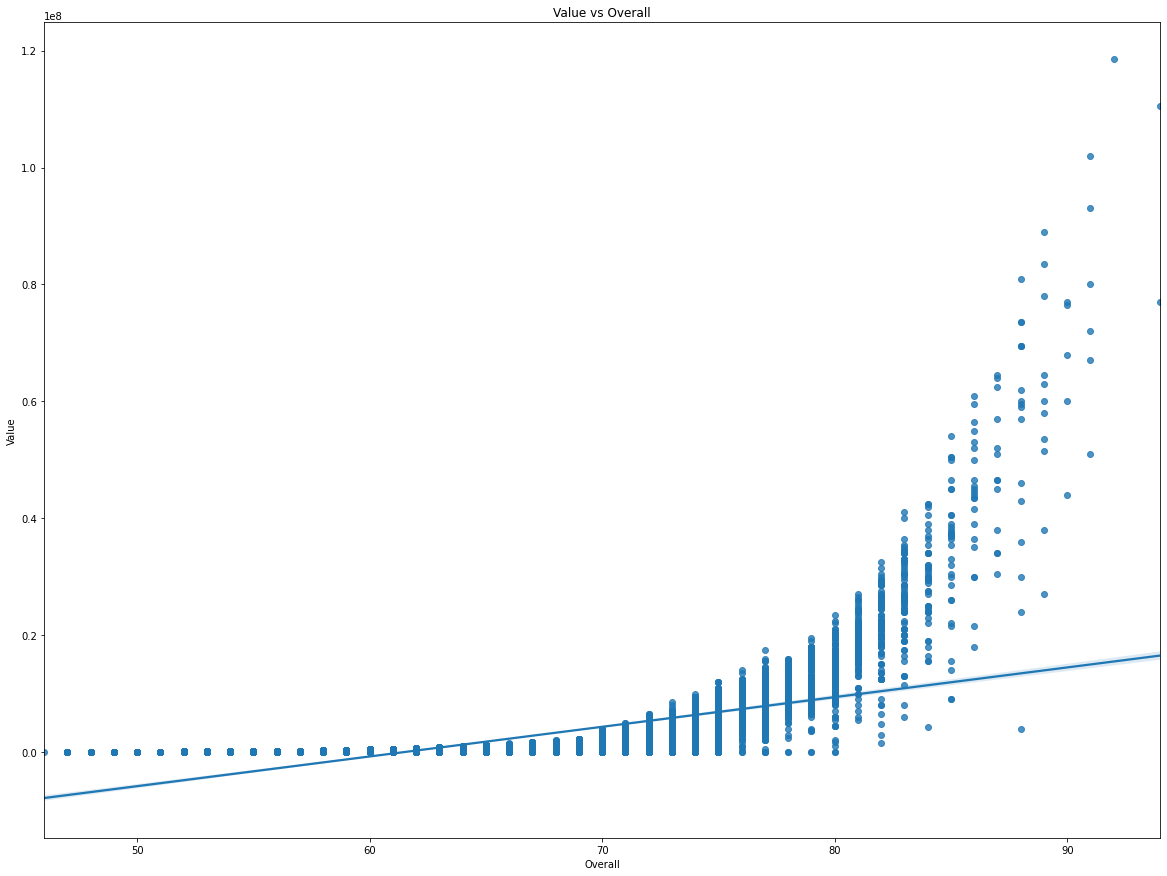

In [52]:
plt.figure(figsize=(20, 15))
sns.regplot(data_interes['Overall'] , data_interes['Value'])
plt.title('Value vs Overall')
plt.show()

***Value vs Overall***

Con el fin de observar las variables que pueden llegar a influir en el valor de un jugador se analiza una de las principales variables dentro del dataset como lo es el Overall. De esta grafica se puede extraer distintas conclusiones:

1. La tendencia de la grafica es lineal.
2. Se pueden observar unos primeros casos de jugadores subvalorados y sobrevalorados: A pesar de que a varios jugadores se les considera el valor proporsional a su overall, vemos casos donde jugadores tienen un overall superior a 75 (tomando 75 como aceptable) y su valor esta por debajo del promedio, incluso del minimo si lo comparamos con jugadores con un overall menor a 50. Tambien vemos jugadores con un overall bajo y cuentan con un valor mayor que otro con un overall superior.
3. Se presenta mayor dispersión en los jugadores con un overall mayor a 85

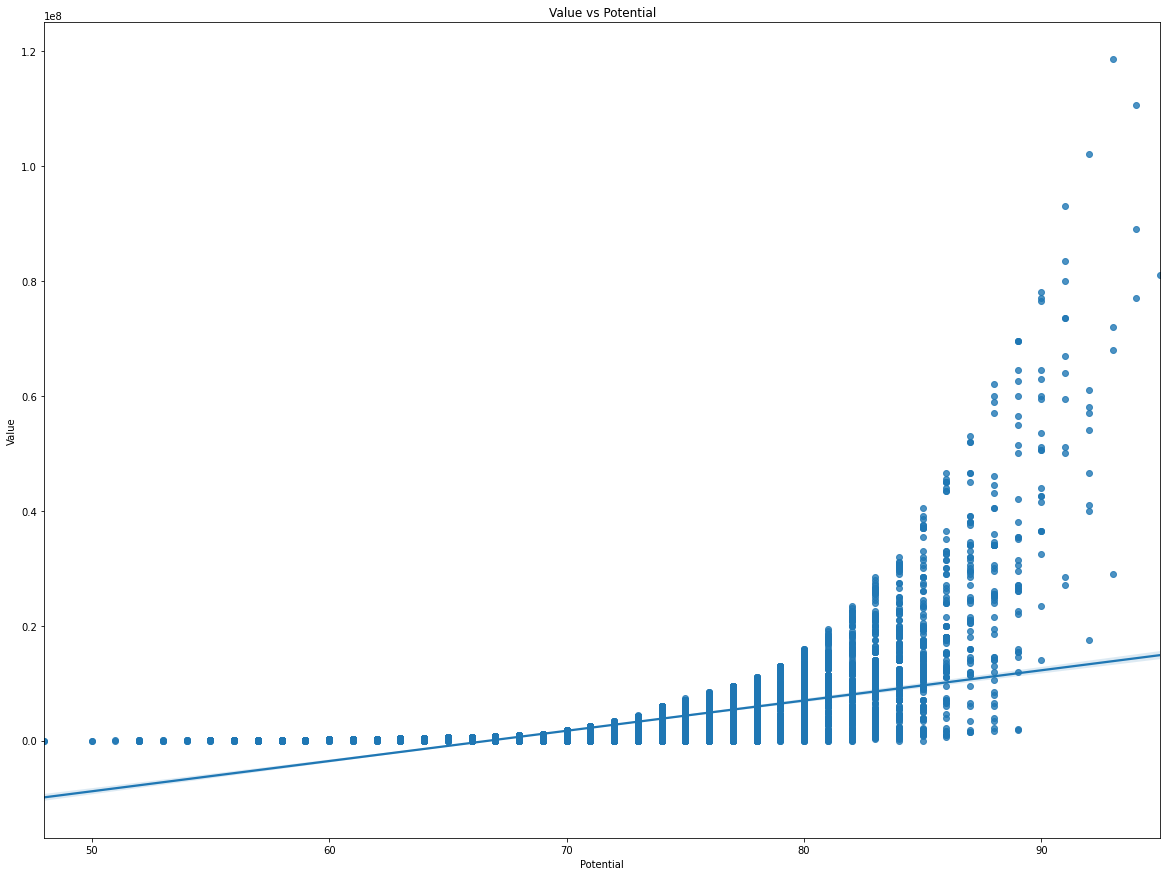

In [57]:
plt.figure(figsize=(20, 15))
sns.regplot(data_interes['Potential'] , data_interes['Value'])
plt.title('Value vs Potential')
plt.show()

 ***Value vs Potential***
 
 Debido a la naturaleza de los datos se observa un comportamiento similar a la grafica de overall vs Value, lo cual se esperaba y de igual manera permite deducir mediante un ligero analisis casos de jugadores subvalorados como sobrevalorados

In [61]:
copia = data_interes.copy()
copia['Skills_sum']= copia[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning']].sum(axis=1)

***Analisis de skills:***

Con el fin de observar el comportamiento de diferentes variables que me pueden llegar a definir un skill total de cada jugador, se construye una nueva variable la cual me agrupa la suma de los valores de cada una de estas caracteristicas. Este total lo grafico vs el valor de cada jugador, para asi, observar de manera mas general cuales son aquellos jugadores que esta sobrevalorados y subvalorados

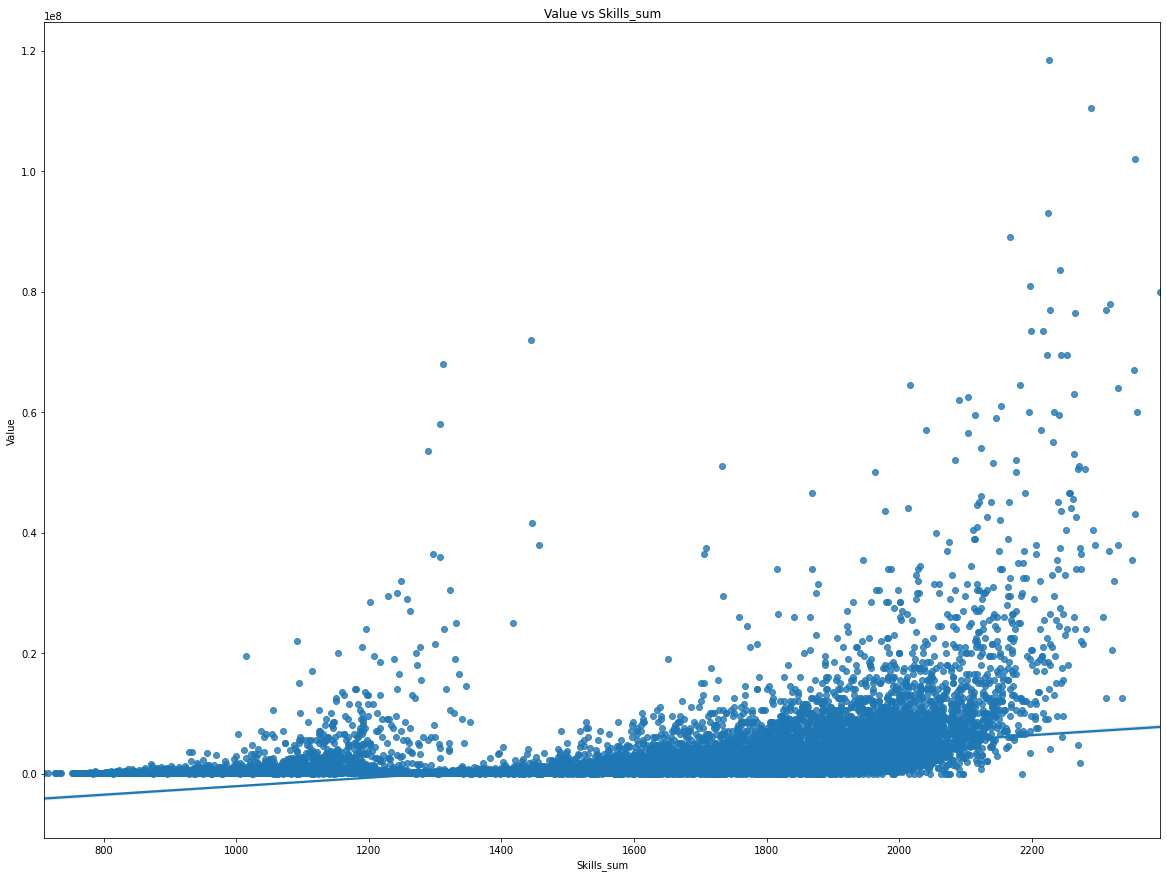

In [62]:
plt.figure(figsize=(20, 15))
sns.regplot(copia['Skills_sum'] , copia['Value'])
plt.title('Value vs Skills_sum')
plt.show()

***Value vs Skills_sum***

En esta grafica se puede observar un comportamiento mas general de los jugadores respecto al valor. Por ejemplo en el rango de skill de 1200 - 1400 se observar jugadores con un valor alto los cuales los podemos clasificar como jugador sobrevalorados, y caso contrario vemos jugadores con un skill mayor a 2000 cuyo valor es muy bajo (jugadores subvalorados)

In [63]:
copia['Value'].mean()

2416131.3949006004

In [64]:
copia['Value'].max()

118500000.0

***TOP JUGADORES SUB-VALORADOS A PARTIR DEL ANALISIS GRAFICO***

Para la obtencion del top de jugadores sub-valorados se realizaran los siguientes metodos:

1. Por el total de Skills: 

    a. Se eligiran todos aquellos jugadores que cuenten con un skill mayor a 2150
    
    b. Se ordenaran de mayor a menor skill y se eligiran los primeros 100
    
    c. De ese top 100 se eligiran los jugadores que tengan un valor menor a los 20M y obtenemos el top de jugadores subvalorados por skill.
    

2. Por el valor de jugador:

    a. Se eligiran los jugadores con un skill mayor a 2150
    
    b. Se ordenara la data por Value de menor a mayor    
    
    c. Se seleccionara los 20 jugadores con menor Value
    
    d. De esos 20 jugadores se escogera el top 10 de jugadores con mayop skill y sera el top de jugadores sub-valorados

In [65]:
copia2= copia[(copia.Skills_sum >=2150)]

In [68]:
copia2

,ID,Name,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Skills_sum
0,158023,L. Messi,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2290.0
1,20801,Cristiano Ronaldo,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2312.0
2,190871,Neymar Jr,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2226.0
4,192985,K. De Bruyne,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2356.0
5,183277,E. Hazard,27,91,91,93000000.0,340000.0,4.0,4.0,4.0,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,192575,E. Badu,27,75,75,7000000.0,25000.0,2.0,3.0,3.0,...,69.0,74.0,72.0,15.0,5.0,9.0,13.0,14.0,12600000.0,2161.0
1716,221000,B. Ndiaye,27,75,75,7000000.0,40000.0,1.0,3.0,3.0,...,75.0,72.0,68.0,7.0,12.0,11.0,7.0,10.0,NaN,2187.0
1809,230767,Renato Sanches,20,75,84,10000000.0,41000.0,3.0,4.0,3.0,...,73.0,70.0,64.0,5.0,12.0,6.0,13.0,14.0,18500000.0,2155.0
1880,202135,S. Sturaro,25,75,78,8000000.0,71000.0,2.0,3.0,3.0,...,76.0,78.0,77.0,15.0,10.0,5.0,14.0,11.0,NaN,2156.0


In [70]:
copia2['Value'].max()

118500000.0

In [71]:
copia2['Value'].min()

0.0

***By skill:***

In [92]:
skill= copia2.sort_values(by='Skills_sum', ascending=False)
skill.reset_index(drop=True, inplace=True)


In [93]:
rank = skill[:100]
rank =  rank[(rank.Value <=20000000)]
rank.reset_index(drop=True,inplace=True)

In [95]:
rank[['Name','Value', 'Skills_sum','Wage']]

,Name,Value,Skills_sum,Wage
0,M. Acuña,12500000.0,2337.0,16000.0
1,A. Kolarov,12500000.0,2312.0,73000.0
2,D. Srna,1700000.0,2273.0,27000.0
3,Dani Alves,4800000.0,2270.0,62000.0
4,Fernandinho,18000000.0,2255.0,185000.0
5,Z. Junuzović,9500000.0,2248.0,39000.0
6,R. Rodríguez,15500000.0,2247.0,81000.0
7,Ander Herrera,17500000.0,2246.0,140000.0
8,C. Erkin,6000000.0,2246.0,41000.0
9,K. Boateng,15000000.0,2244.0,65000.0


Tabla a: Lista de 28 jugadores sub-valorados en relacion de Value y skill

***By value-skill:***

In [96]:
value= copia2.sort_values(by='Value', ascending=True)
value.reset_index(drop=True,inplace=True)

In [98]:
value_rank= value[:20]
value_rank = value_rank.sort_values(by='Skills_sum', ascending=False)
value_rank.reset_index(drop=True,inplace=True)

In [100]:
value_rank[['Name','Value', 'Skills_sum','Wage']]

,Name,Value,Skills_sum,Wage
0,D. Srna,1700000.0,2273.0,27000.0
1,Dani Alves,4800000.0,2270.0,62000.0
2,C. Erkin,6000000.0,2246.0,41000.0
3,Adriano,4000000.0,2227.0,45000.0
4,L. Baines,3400000.0,2198.0,74000.0
5,L. Piszczek,7000000.0,2198.0,57000.0
6,Gazzolisco,6500000.0,2190.0,26000.0
7,Jefferson,6500000.0,2186.0,14000.0
8,L. Paredes,0.0,2186.0,0.0
9,M. Layún,6500000.0,2181.0,28000.0


Tabla b: Lista de 20 jugadores sub-valorados en base al menor Value y con un Skilll mayor a 2150

***BY Overall:***

In [107]:
overall= copia2.sort_values(by='Overall', ascending=False)
overall.reset_index(drop=True, inplace=True)

In [108]:
overall = overall[(overall.Overall >=80)]
overall.reset_index(drop=True, inplace=True)

In [111]:
rank_overall = overall[:50]
#rank_overall =  rank_overall[(rank_overall.Value <=15000000)]
#rank_overall.reset_index(drop=True,inplace=True)

In [113]:
rank_overall= rank_overall.sort_values(by='Value', ascending=True)
rank_overall.reset_index(drop=True, inplace=True)

In [115]:
rank_overall = rank_overall[:20]
rank_overall[['Name','Value', 'Overall','Wage']]

,Name,Value,Overall,Wage
0,Fernandinho,18000000.0,86,185000.0
1,Filipe Luís,21500000.0,85,81000.0
2,A. Vidal,26000000.0,85,205000.0
3,B. Matuidi,26000000.0,85,145000.0
4,S. Khedira,33000000.0,85,160000.0
5,J. Vertonghen,34000000.0,87,155000.0
6,Azpilicueta,35000000.0,86,175000.0
7,R. Nainggolan,35500000.0,85,105000.0
8,Alex Sandro,36500000.0,86,160000.0
9,Paulinho,37000000.0,85,235000.0


Tabla c: Top 20 de jugadores sub-valorados teniendo encuenta su Overall. A pesar de que tienden a ser jugadores sub_valorados por el score de su Overall, el Value es alto a comparación de los jugadores analisados por skills.


***TOP RECOMENDADO:***

Para el top de jugadores sub-valorados recomendados, se seleccionaran aquellos jugadores que se encuentren en la Tablaa y Tabla b 

In [134]:
nombres1= rank['Name']
nombres2= value_rank['Name']

In [135]:
set_nombre1= set(nombres1)
set_nombre2= set(nombres2)

In [136]:
sub_valorados= set_nombre1 & set_nombre2

In [137]:
sub_valorados

{'Adriano', 'C. Erkin', 'D. Srna', 'Dani Alves'}

Por el analisis estadistico realizado con aterioridad los jugadores que se sugieren contratar por el club son 4:
'Adriano', 'C. Erkin', 'D. Srna', 'Dani Alves'. Tambien se observo que hay un jugador (L. Paredes) con Value = 0 y un skill de 2186, siendo el candidato mas optimo a contratar.

Sin embargo todos los jugadores tanto de la Tabla a, Tabla b y Tabla c son buenos candidatos a ser contratados

.

***GUARDO EL CSV DATA_INTERES PARA USAR EN LA ETAPA DE CREACION DE UN MODELO DE MACHINE LEARNING PARA ESTIMAR EL VALOR DE UN JUGADOR.***

In [138]:
data_interes

,ID,Name,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,65,60000.0,1000.0,1.0,2.0,2.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,243165,N. Christoffersson,19,47,63,60000.0,1000.0,1.0,2.0,2.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,241638,B. Worman,16,47,67,60000.0,1000.0,1.0,3.0,2.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,246268,D. Walker-Rice,17,47,66,60000.0,1000.0,1.0,3.0,2.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [139]:
data_interes.drop(data_interes.filter(regex="Unname"),axis=1, inplace=True)#elimina unnames creados
data_interes.to_csv(r'Data_interes.csv',index=False,encoding= 'utf-8')